# Chapter 1 : Signals

## Example1,page no12

In [2]:
from numpy.random import randint
from numpy import pi, arange
from mpmath  import quad, sin, cos
#Given:
n=round(randint(1000))#any integers
m=round(randint(1000))#any integers
wo=2*(n+m)*pi#Angular Freq
t=arange(0,2*pi/wo,0.01)
to=0;t1=2*pi/wo
C= quad(lambda t:sin(n*wo*t)*cos(m*wo*t),[to,t1])# integrating sin(n*wo*t)*cos(m*wo*t) function
print "The value of the above integral is:C=%d\n Since C=%d, the two functions: \n  f(t)=sin(n*wo*t)\n  g(t)=cos(n*wo*t) are Orthogonal"%(C,C)

The value of the above integral is:C=0
 Since C=0, the two functions: 
  f(t)=sin(n*wo*t)
  g(t)=cos(n*wo*t) are Orthogonal


## Example2,page no 12

In [1]:
from numpy import arange,pi
from mpmath  import quad, sin
#Given:
# Curve on page no 9....fig 1.6
t=arange(0,2*pi,0.1)
t0=0
t1=2*pi
C=((quad(lambda t: sin(t),[t0,t1/2])-quad(lambda t: sin(t),[t1/2,t1]))/quad(lambda t :(sin(t))**2,[t0,t1]))

print "The optimum value of C to minimise the mean square error is:\n C= %f"%(C)

The optimum value of C to minimise the mean square error is:
 C= 1.273240


## Example3,page no12

In [1]:
from numpy import arange
from mpmath  import quad
from math import pi,sin
#Given:
#a  # Referance Figure on page no 9.. (1.6d)

t=range(0,int(2*3.14+1))
t0=0
t1=2*3.14
print 'a) The value of constants Cn are:'
C=[]        
for i in range(1,8):
    C.append((quad(lambda t:sin(i*t),[t0,t1/2])-quad(lambda t:sin(i*t),[t1/2,t1]))/quad(lambda t:(sin(i*t))**2,[t0,t1]))
    if C[i-1] <= 0.01:
        C[i-1]=0
    
    print '%f    for n= %d\n'%(C[i-1],i)

#b Mean Square error

int1=quad(lambda t:(1)**2,[t0,t1])
for n in range(1,8):
    if (n%2) == 0:
        C[n-1] = 0
    else:
        C[n-1]=4.0/(n*pi)


K=[]
for n in range(1,8):
 
    K.append(quad(lambda t:(sin(n*t))**2,[t0,t1]))
 
K[n-1]=pi
S=[0]
for n in range(1,8):
    S.append(S[n-1]+(((C[n-1])**2)*K[n-1]))
#Mean Square error
epsi=[]
for n in range(1,8):
    epsi.append((1.0/(t1-t0)*(int1-S[n])))

print 'b) Mean Square error is'
for n in arange(1,2+7,2):
    print 'epsi(%d) = %f\n'%(n,round(100*epsi[n-1])/100)

a) The value of constants Cn are:
1.273237    for n= 1

0.000000    for n= 2

0.424406    for n= 3

0.000000    for n= 4

0.254636    for n= 5

0.000000    for n= 6

0.181874    for n= 7

b) Mean Square error is
epsi(1) = 0.190000

epsi(3) = 0.100000

epsi(5) = 0.070000

epsi(7) = 0.050000



## Example4,page no12

In [2]:
from sympy import symbols,solve
from mpmath  import quad
from numpy import arange
#Given:
t=arange(-1,1.01,0.01)
t0=-1
t1=1
# Legendre Polynomial
t=symbols("t")
P0=1
P1=t
P2=-0.5+1.5*t**2
P3=-1.5+2.5*t**2
print "P0 =",P0
print "P1 =",P1
print "P2 =",P2
print "P3 =",P3
#The Constant coeff (Cn)
C0=0.5*(quad(lambda t:1,[-1,0])+quad(lambda t:-1,[0,1]))
C1=1.5*(quad(lambda t:t,[-1,0])+quad(lambda t:-t,[0,1]))
C2=2.5*(quad(lambda t:(1.5*t**2)-0.5,[-1,0])+quad(lambda t:-(1.5*t**2)+0.5,[0,1]))
C3=3.5*(quad(lambda t:(2.5*t**3)-(1.5*t),[-1,0])+quad(lambda t:-(2.5*t**3)+(1.5*t),[0,1]))
print "\nThe Constant coeff (Cn) values are :"
print "C0 =",C0
print "C1 =",C1
print "C2 =",C2
print "C3 =",C3
print "\nf(t)= %d*%s + %f*%s + %d*%s + %f*%s"%(C0,"P0",C1,"P1",C2,"P2",C3,"P3")

P0 = 1
P1 = t
P2 = 1.5*t**2 - 0.5
P3 = 2.5*t**2 - 1.5

The Constant coeff (Cn) values are :
C0 = 0.0
C1 = -1.5
C2 = 0.0
C3 = 0.875

f(t)= 0*P0 + -1.500000*P1 + 0*P2 + 0.875000*P3


## Example 5, page no 19

In [3]:
from math import pi,cos,sin
from numpy import arange,trapz
#given
T=1
t0=0
wo=2*pi
P=1
t=arange(0,1.001,0.001)
f=P*t
#The trigonometric Fourier series coeff for given function
a0=(1/T)*trapz(t,f)
a=[]
a.append(0)
for n in range(1,11):
    f1=[]
    for tt in t:
        f1.append((P*tt)*cos(wo*n*tt))
    a.append((2/T)*trapz(t,f1))
    
    if a[(n)]<2.01:
        a[(n)]=0
    
b=[]
b.append(0)
for n in range(1,11):
    f2=[]
    for tt in t:
        f2.append((P*tt)*sin(2*pi*(1/T)*n*tt))
    b.append(-(2/T)*trapz(t,f2))

# Displaying trigonometric Fourier series coeff
print "The value of a0 is: %f\n"%(a0)
print "The values of a(n):   (upto n=10)"
for n in range(1,11):
    print a[(n)]

print "The values of b(n):    (upto n=10)"
for n in range(1,11):
    print b[(n)]

print "The trigonometric Fourier series for given function\n can be written as:\n"
print "f(t)=%f%fsin(2*pi*t)%fsin(4*pi*t)\n%fsin(6*pi*t)%fsin(8*pi*t)%fsin(10*pi*t)\n%fsin(12*pi*t)%fsin(14*pi*t)......."%(b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8])

The value of a0 is: 0.500000

The values of a(n):   (upto n=10)
0
0
0
0
0
0
0
0
0
0
The values of b(n):    (upto n=10)
-0.318308838986
-0.159152848691
-0.106100153783
-0.0795732827116
-0.0636567411629
-0.0530453643632
-0.0454655102642
-0.0397803578398
-0.0353583398512
-0.0318205159538
The trigonometric Fourier series for given function
 can be written as:

f(t)=-0.318309-0.159153sin(2*pi*t)-0.106100sin(4*pi*t)
-0.079573sin(6*pi*t)-0.063657sin(8*pi*t)-0.053045sin(10*pi*t)
-0.045466sin(12*pi*t)-0.039780sin(14*pi*t).......


## Example 6, page no 21

In [2]:
from __future__ import division
from numpy import nditer,trapz, arange
from math import cos,sin,pi
#given

t0=1
T=1
w0=2*3.14/T
P=1
t=arange(0,0.1+1,0.1)
f=[P*tt for tt in t]# function f(t)=P*t, 0<t<1
a=1
print 'The Exponential Fourier coeff(Fn) are:for n=-5 to 5'
Fr=[];Fi=[]
for n in range(-5,6):  # Calculating the fourier coeff
    fr=[ff*cos(pi*n*tt/T) for ff,tt in nditer([f,t])]
    #Fr(a)=inttrap(t,fr)
    Fr.append(trapz(t,fr))
    fi=[ff*sin(pi*n*tt/T) for ff,tt in nditer([f,t])]
    Fi.append(trapz(t,fi))
    if Fr[a-1] < 0.01:
        Fr[a-1]=0
    
    if Fi[a-1] < 0.01:
        Fi[a-1]=0
    
    print Fr[a-1]-1J*Fi[a-1],'\n'
    a=a+1

print '\nThe given function in Expo Fourier series can be represented as \n'
print 'f(t)= %f+jP/2*pi* ∑1/n *exp(j2*pi*t)'%(P/2)

The Exponential Fourier coeff(Fn) are:for n=-5 to 5
-0.05j 

(1+0j) 

-0.0981305252753j 

(1+0j) 

-0.315687575734j 

(0.5+0j) 

0j 

(1-0.153884176859j) 

0j 

(1-0.0688190960236j) 

0j 


The given function in Expo Fourier series can be represented as 

f(t)= 0.500000+jP/2*pi* ∑1/n *exp(j2*pi*t)


## Example 7, page no 22

The Expo fourier series coeff are: for n=-5 to 5
(2.77555756156e-17-1.37737043993e-15j) 

(0.127481160803+3.12250225676e-16j) 

(-1.9567680809e-15-1.47624967806e-15j) 

(0.636776885598+6.54858112181e-16j) 

(-1.69309011255e-15-0.5j) 

(-1.90970223489+0j) 

(-1.69309011255e-15+0.5j) 

(0.636776885598-6.54858112181e-16j) 

(-1.9567680809e-15+1.47624967806e-15j) 

(0.127481160803-3.12250225676e-16j) 

(2.77555756156e-17+1.37737043993e-15j) 

The given function in Expo Fourier series can be represented as 

f(t)= 2V/pi -2V*exp(j2*pi*t)/3*pi -2V*exp(j2*pi*t)/15*pi
      -2V*exp(j2*pi*t)/35*pi ...
     -2V*exp(-j2*pi*t)/3*pi -2V*exp(-j2*pi*t)/15*pi...


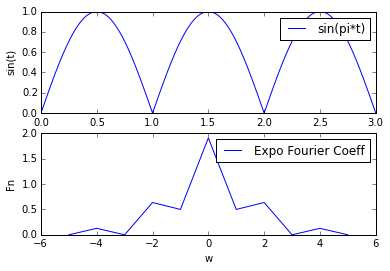

In [1]:
from numpy import arange,sin,pi,cos,trapz,nditer,zeros
%matplotlib inline 
from matplotlib.pyplot import plot,subplot,title,legend,xlabel,ylabel,show

#given
V=1
t0=1
T=1
w0=2*3.14/T
P=1
t=arange(0,0.01+3,0.01)
f=[V*abs(sin(pi*tt)) for tt in t]
#The Expo fourier series coeff
print 'The Expo fourier series coeff are: for n=-5 to 5'
a=1
Fr=[];Fi=[];mag=[]
for n in range(-5,6):
    fr=[ff*cos(pi*n*tt/T) for ff,tt in nditer([f,t])]
    Fr.append(trapz(t,fr))
    fi=[ff*sin(pi*n*tt/T) for ff,tt in nditer([f,t])] 
    Fi.append(trapz(t,fi))
    mag.append(abs(Fr[a-1]+1J*Fi[a-1]))

    print Fr[a-1]-(1J*Fi[a-1]),'\n'
    x=zeros(len(t))
    #x=x+((Fr(a))-1J*Fi(a)).*(cos(pi*n*t/T)+1J*sin(pi*n*t/T))
    x=x+((Fr[a-1])-1J*Fi[a-1])*(cos(pi*n*t/T)+1J*sin(pi*n*t/T))
    a=a+1

print 'The given function in Expo Fourier series can be represented as \n'
print 'f(t)= 2V/pi -2V*exp(j2*pi*t)/3*pi -2V*exp(j2*pi*t)/15*pi\n      -2V*exp(j2*pi*t)/35*pi ...\n     -2V*exp(-j2*pi*t)/3*pi -2V*exp(-j2*pi*t)/15*pi...'
n=range(-5,6)
subplot(2,1,1)
plot(t,f) # Rectified sine function Plot
xlabel("t")
ylabel("sin(t)")
legend(["sin(pi*t)"])
subplot(2,1,2)
plot(n,mag) #Plot of the magnitude of the Fourier coeff
xlabel("w")
ylabel("Fn")
legend(["Expo Fourier Coeff"])
show()

## Example 8, page no 24

The fourier series coeff Fn are:
(-0.185792520964+0j) 

(-0.121542879381+6.93889390391e-18j) 

(-0.0695370407613+0j) 

(-0.0312803786267+0j) 

(-0.00787673751141+1.73472347598e-18j) 

(1+0j) 

(-0.00787673751141+1.73472347598e-18j) 

(-0.00787673751141-1.73472347598e-18j) 

(-0.0312803786267+0j) 

(-0.0695370407613+0j) 

(-0.121542879381-6.93889390391e-18j) 

(-1.23107341487-2.77555756156e-17j) 

(-0.86361423984-2.77555756156e-17j) 

(-0.520835737317-2.77555756156e-17j) 

(-0.243085758762+2.77555756156e-17j) 

(-0.0625607572533+0j) 

(1+0j) 

(-0.0625607572533+0j) 

(-0.0625607572533+0j) 

(-0.243085758762-2.77555756156e-17j) 

(-0.520835737317+2.77555756156e-17j) 

(-0.86361423984+2.77555756156e-17j) 



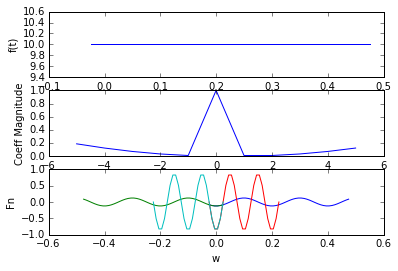

In [2]:
from numpy import pi,arange,cos,sin,trapz,zeros
%matplotlib inline 
from matplotlib.pyplot import plot,subplot,title,legend,xlabel,ylabel,show

#given

T=500e-3
w0=2*pi/T
d=50e-3
A=10
t=arange(-d/2,0.01+T-d/2,0.01)
t1=arange(-d/2,0.01+d/2,0.01)
f1=A
t2=arange(d/2,0.01+T-(d/2),0.01)
f2=0
a=0
Fr=[];Fi=[];mag=[]
print 'The fourier series coeff Fn are:'
for n in range(-5,6):
    if n==0:
       Fr.append(1);Fi.append(0)
    else: 
      fa1=f1*cos(pi*n*t1/T)
      fa2=f2*cos(pi*n*t2/T)
      fb1=f1*sin(pi*n*t1/T)
      fb2=f2*sin(pi*n*t2/T)
    
    Fr.append(1/T*(trapz(t1,fa1)+trapz(t2,fa2)))
    Fi.append(trapz(t1,fb1)+trapz(t2,fb2))
    mag.append(abs(Fr[a]+1J*Fi[a]))

    print Fr[a]-1J*Fi[a],'\n'
    x=zeros(len(t))
    x=x+((Fr[a])-1J*Fi[a])*(cos(pi*n*t/T)+1J*sin(pi*n*t/T))
    a=a+1

n=range(-5,6)
subplot(3,1,1)
plot(t,[f1]*len(t))
xlabel("t")
ylabel("f(t)")
subplot(3,1,2)
plot(n,mag) # expo fourier series coeff
xlabel("n") 
ylabel("Coeff Magnitude") 
subplot(3,1,3)
plot(t,x)
plot(-t,x) # one sided spectrum with T=500ms
xlabel("w")
ylabel("Fn")

T1=T/2
t=arange(-d/2,0.01+T1-d/2,0.01)
t1=arange(-d/2,0.01+d/2,0.01)
f1=A
t2=arange(d/2,0.01+T1-(d/2),0.01)
f2=0
#The Expo fourier series coeff
a=0
Fr1=[];Fi1=[];mag=[]
for n in range(-5,6):
    if n==0:
       Fr1.append(1);Fi1.append(0)
    else :
        fr1=f1*cos(pi*n*t1/T1)
        fr2=f2*cos(pi*n*t2/T1)
        fi1=f1*sin(pi*n*t1/T1)
        fi2=f2*sin(pi*n*t2/T1)
    
    Fr1.append(1/T1*(trapz(t1,fr1)+trapz(t2,fr2)))
    Fi1.append(1/T1*(trapz(t1,fi1)+trapz(t2,fi2)))
    mag.append(abs(Fr1[a]+1J*Fi1[a]))
    print Fr1[a]-1J*Fi1[a],'\n'
    y = zeros(len(t))
    y=y+((Fr1[a])-1J*Fi1[a])*(cos(pi*n*t/T1)+1J*sin(pi*n*t/T1))
    a=a+1

plot(t,y)
plot(-t,y) # double sided spectrum with T=250ms
show()

## Example 9, page no 12

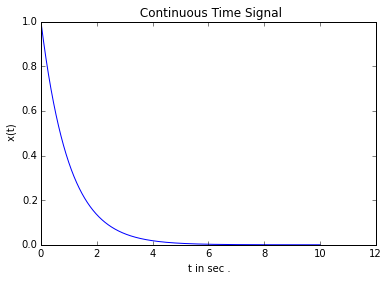

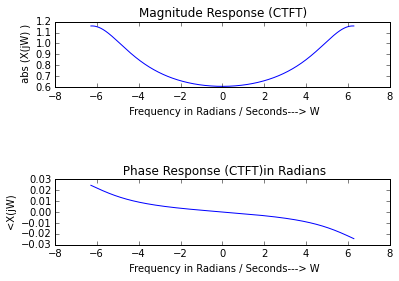

|F(w)|= 1/sqrt(a**2+w**2) and
 Theta(w)=-atan(w/a)


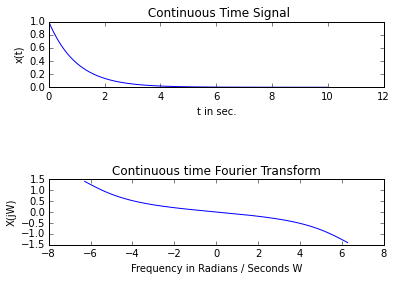

|F(w)|= 2*a/sqrt(a**2+w**2) and
 Theta(w)=0


In [1]:
from __future__ import division
from numpy import arange, exp, pi, transpose, mat, fliplr, angle, absolute, shape
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

#Given:
# Analog Signal
A =1 # Amplitude
Dt = 0.005#
t = arange(0,Dt+10,Dt)
xt = exp(-A*t)#

# Continuous time Fourier Transform
Wmax =2*pi*1# # Analog Frequency = 1Hz
K = 4#
k = arange(0,(K/1000)+K, (K/1000))
W = k* Wmax /K#
XW = mat(xt)*exp(-1J*transpose(mat(t))*mat(W))*Dt
XW_Mag =abs(XW)#
W = -1*fliplr(mat(W))+mat(W)#  (2:1001)]# # Omega from -Wmax to Wmax
XW_Mag=fliplr(XW_Mag )+XW_Mag  # (2:1001)]#


#[XW_Phase ,db] = phasemag (XW)#
XW_Phase = angle(XW)
db=abs(XW)
XW_Phase = -1*fliplr(XW_Phase)+XW_Phase #(2:1001)]#



# Plotting Continuous Time Signal
plot(t,xt)#
xlabel( 't in sec .')#
ylabel(' x(t) ')
title(' Continuous Time Signal ' )
show()


# Plotting Magnitude Response of CTS
subplot (3 ,1 ,1)#
i, j = shape(W)
W1=[]
XW_Mag1=[]
for ii in range(0,i):
    for jj in range(0,j):
        W1.append(W[ii,jj])
        XW_Mag1.append(XW_Mag[ii,jj])
        
plot(W1, XW_Mag1)
xlabel ( ' Frequency in Radians / Seconds---> W' )#
ylabel ( ' abs (X(jW) ) ' )
title ( 'Magnitude Response (CTFT) ' )




# Plotting Phase Reponse of CTS
subplot (3 ,1 ,3)#

i, j = shape(W)
W1=[]
XW_Phase1=[]
for ii in range(0,i):
    for jj in range(0,j):
        W1.append(W[ii,jj])
        XW_Phase1.append(XW_Phase[ii,jj])


plot(W1, [xx*pi/180 for xx in XW_Phase1 ])
xlabel(' Frequency in Radians / Seconds---> W')#
ylabel('<X(jW) ')
title(' Phase Response (CTFT)in Radians' )
show()
print '|F(w)|= 1/sqrt(a**2+w**2) and\n Theta(w)=-atan(w/a)'

#Part b 
# Analog Signal

A=1## Amplitude
Dt=0.005#
t1=arange(-4.5,Dt+4.5,Dt)
xt1=exp(-A*abs(t1))
# Continuous time Fourier Transform
Wmax1 =2*pi*1## Analog Frequency = 1Hz
K=4#
k=arange(0,(K/1000)+K,(K/1000))
W1=k*Wmax1/K
XW1=mat(xt1)*exp(-1J*transpose(mat(t1))*mat(W1))*Dt
XW1=(XW1).real
W1=-1*fliplr(mat(W1))+mat(W1) # (2:1001) ]# # Omega from -Wmax to Wmax
XW1=fliplr(mat(XW1))+mat(XW1) #(2:1001) ]#
subplot(3 ,1 ,1)#
plot(t,xt)
xlabel('t in sec.')#
ylabel('x(t)')
title(' Continuous Time Signal')
subplot(3 ,1 ,3)
i, j = shape(W1)
W11=[]
XW11=[]
for ii in range(0,i):
    for jj in range(0,j):
        W11.append(W[ii,jj])
        XW11.append(XW_Phase[ii,jj])

plot(W11,XW11)
xlabel('Frequency in Radians / Seconds W')#
ylabel('X(jW)')
title('Continuous time Fourier Transform ')
show()
print '|F(w)|= 2*a/sqrt(a**2+w**2) and\n Theta(w)=0'

## Example10, page no 38

In [1]:
from numpy import pi,sin

#Given
#a
A=1
delta=1e-3
T=10e-3
w0=2*pi/T
n=0
for i in range(0,11):
    if n==0:
        Sa=1 
    else :
        Sa=sin(n*pi*delta/T)/(n*pi*delta/T)
    

F=(A*delta/T)*Sa #spectral Amplitude
print 'a)\nAt wo,n=0: The spectral amplitude is: F0= %f V\n'%F
#b
# displaying the fourier Transform of the given function
print 'b)\nThe Fourier tranform of f(t-delta/2) is given as: '
print '\nf(t)=A*delta/T*∑Sa(n*delta*pi/T)*exp(jwo(t-delta/2))'

a)
At wo,n=0: The spectral amplitude is: F0= 0.100000 V

b)
The Fourier tranform of f(t-delta/2) is given as: 

f(t)=A*delta/T*∑Sa(n*delta*pi/T)*exp(jwo(t-delta/2))


## Example11(1), page no 39

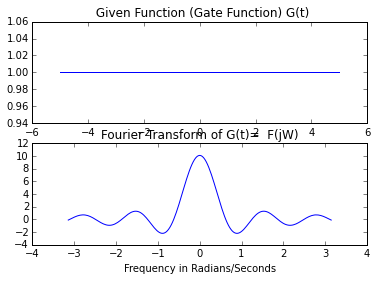

F(w)= A*t*Sa(w*t/2) 


In [1]:
from numpy import arange, ones,pi,exp,mat,transpose, shape
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

#Given
T = 10# #time Tau
Tg = arange(-T/2,0.1+T/2,0.1)  # time period for given Gate Function -tau/2 to tau/2
G_t0 = 1# #Magnitude of Gate Function (A)
G_t = G_t0*ones (len(Tg))## Gate function G(t)
f = arange(-pi,pi / len(Tg)+pi,pi / len(Tg))
Dw = 0.1#
F_jW =mat(G_t)*exp(1J*transpose(mat(Tg))*mat(f))*Dw## fourier Transform of the gate function
F_jW = (F_jW).real
# Plotting the Fourier Transform of G(t)
subplot (2 ,1 ,1)
plot(Tg,G_t)
title( ' Given Function (Gate Function) G(t) ' )
subplot(2 ,1 ,2)
i,j =shape(mat(f))
m,n=shape(F_jW)
f1=[];F_jW1=[]
for ii in range(0,i):
    for jj in range(0,j):
        f1.append(mat(f)[ii,jj])
for ii in range(0,m):
    for jj in range(0,n):
        F_jW1.append(F_jW[ii,jj])
        

plot(f1,F_jW1)
xlabel('Frequency in Radians/Seconds ')#
title('Continuous time Fourier Transform X(jW)' )
title ( 'Fourier Transform of G(t)=  F(jW) ' )
show()
print 'F(w)= A*t*Sa(w*t/2) '

## Example11(2), page no 43

|F(w)|= 2*pi*A*delta(w), Hence the Fourier Transform of constant is an Impulse Function


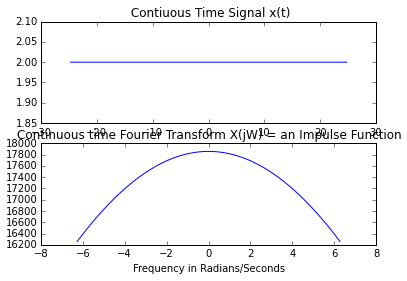

In [1]:
from __future__ import division
from numpy import arange, ones,pi,exp,mat,transpose,pi, fliplr, shape
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

#Given
# CTS Signal
A=2## Amplitude
Dt=0.01#
T1=49.5# #Time in seconds
t=arange(-T1/2,Dt+T1 /2, Dt)
xt=[]
for i in range(0,len(t)):
    xt.append(A)

# Continuous time Fourier Transform
Wmax=2*pi*1## Analog Frequency = 1Hz
K =4#
k=arange(0,(K/1000)+K,(K/1000))
W=k*Wmax/K#
#xt=transpose(mat(xt))
XW =(mat(xt)*exp(1J*transpose(mat(t))*mat(W)*Dt))-5#


XW_Mag =(XW).real
W = -1*fliplr(mat(W))+W # (2:1001)]# # Omega from -Wmax to Wmax
XW_Mag = fliplr(mat(XW_Mag))+XW_Mag #(2:1001)
subplot(2 ,1 ,1)#
plot(t,xt)#
xlabel('t in msec .')#
title(' Contiuous Time Signal x(t) ')
subplot(2 ,1 ,2)#
i,j =shape(mat(W))
m,n=shape(XW_Mag)
W1=[];XW_Mag1=[]
for ii in range(0,i):
    for jj in range(0,j):
        W1.append(mat(W)[ii,jj])
for ii in range(0,m):
    for jj in range(0,n):
        XW_Mag1.append(XW_Mag[ii,jj])

plot(W1,XW_Mag1)
xlabel('Frequency in Radians/Seconds ')#
title('Continuous time Fourier Transform X(jW) = an Impulse Function' )
print '|F(w)|= 2*pi*A*delta(w), Hence the Fourier Transform of constant is an Impulse Function'

## Example13, page no 44

F(w)= 1/(j*w)+ pi*delta(w)


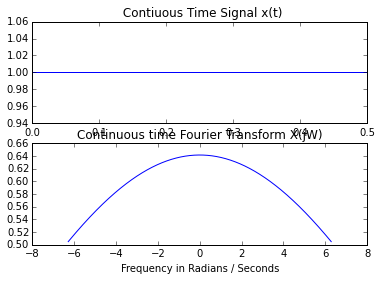

In [1]:
from __future__ import division
from numpy import arange, ones,pi,exp,mat,transpose,pi, fliplr, shape
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot


# CTS Signal
A =1# # Amplitude
Dt = 0.005#
T1 =0.5# #Time in seconds
t=arange(0,Dt+T1, Dt)
xt=[]
for i in range(0,len(t)):
    xt.append(A)

# Continuous time Fourier Transform
Wmax= 2*pi*1# # Analog Frequency = 1Hz
K =4#
k=arange(0,(K/1000)+K,(K/1000))
W =k*Wmax/K#
#xt=transpose(mat(xt))
XW =mat(xt)*exp(-1J*transpose(mat(t))*mat(W))*Dt#
XW_Mag =(XW).real
W =-1*fliplr(mat(W))+W #(2:1001)]# # Omega from -Wmax to Wmax
XW_Mag =fliplr(mat(XW_Mag))+XW_Mag #(2:1001)]
# displaying the given function
subplot(2 ,1 ,1)#
plot(t,xt)#
xlabel('t in msec .')#
title(' Contiuous Time Signal x(t) ')
# displaying the fourier Transform of the given function
subplot(2 ,1 ,2)#
print 'F(w)= 1/(j*w)+ pi*delta(w)'
i,j =shape(mat(W))
m,n=shape(XW_Mag)
W1=[];XW_Mag1=[]
for ii in range(0,i):
    for jj in range(0,j):
        W1.append(mat(W)[ii,jj])
for ii in range(0,m):
    for jj in range(0,n):
        XW_Mag1.append(XW_Mag[ii,jj])

plot(W1,XW_Mag1)

xlabel('Frequency in Radians / Seconds ')#
title('Continuous time Fourier Transform X(jW)' )
show()

## Example14, page no 44

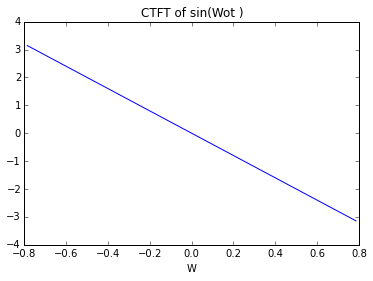

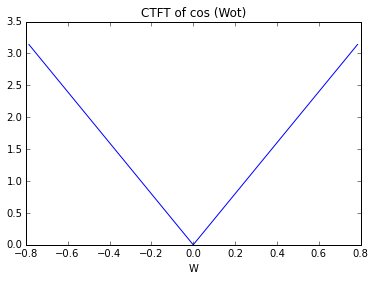

In [1]:
from numpy import pi,sqrt
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

# CTS Signal
# Continuous Time Fourier Transforms of
# Sinusoidal waveforms(a)sin(Wot)(b)cos(Wot)

# CTFT
T1 = 2#
T = 4* T1#
Wo = 2* pi /T#
W = [-Wo ,0, Wo ]#
ak = (2* pi *Wo*T1/ pi )/ 1J#
XW = [-ak ,0, ak ]#
ak1 = (2* pi*Wo*T1/pi)#
XW1 =[ ak1 ,0, ak1 ]#
#displaying the given function
plot(W,[aa.imag for aa in XW])
xlabel('W' )#
title( 'CTFT of sin(Wot ) ')
show()
#displaying the fourier Transform of the given function
plot(W,XW1)
xlabel('W' )#
title( 'CTFT of cos (Wot)')
show()

## Example16, page no 47

In [9]:
from numpy import pi
A=1
delta=50e-3
T=500e-3
print 'Spectral Amplitude of the given function is given by '# Displaying the expression for Spectral Amplitude
print 'Fn= A*delta/2 *[Sa(n*pi*delta/T)]'
print 'Therefore the fourier transform will be :'
print 'F[f(t)]=%f ∑Sa[n*pi/10]8delta(w-4*n*pi)'%(2*pi*A*delta/T)# Displaying the Fourier transform

Spectral Amplitude of the given function is given by 
Fn= A*delta/2 *[Sa(n*pi*delta/T)]
Therefore the fourier transform will be :
F[f(t)]=0.628319 ∑Sa[n*pi/10]8delta(w-4*n*pi)


## Example17,page no12

F[∂t(t)]= 2*pi/T*∑∂(w-wo)


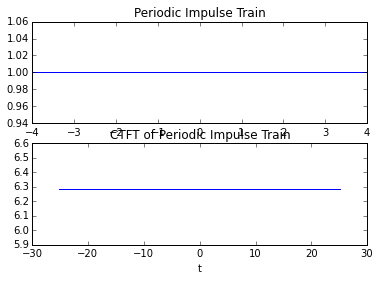

In [10]:
from numpy import ones,pi
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

#Given:
# CTFT
T = range(-4,5)##
T1 = 1# # Sampling Interval
xt = ones (len(T))#
ak = 1/ T1#
XW = 2* pi *ak* ones (len(T))#
Wo = 2*pi/T1#
W = [Wo*Tt for Tt in T]#
# Displaying the given function
subplot(2 ,1 ,1)
plot(T,xt)
xlabel ( 't ' )#
title('Periodic Impulse Train ')
# displaying the fourier Transform of the given function
subplot(2 ,1 ,2)
plot(W,XW)
xlabel('t')#
title ( 'CTFT of Periodic Impulse Train')

print 'F[∂t(t)]= 2*pi/T*∑∂(w-wo)'

## Example18,page no12

Hence Fourier transform of given Gate function is:
 A*delta*Sa[w*delta/2]/ exp(-j*w*delta/2)


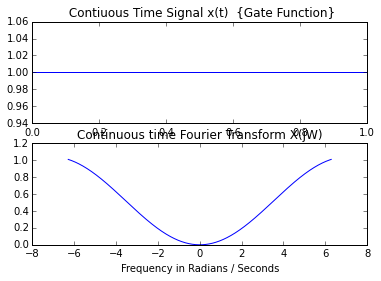

In [2]:
from __future__ import division
from numpy import arange, pi,exp,mat, transpose,fliplr,shape
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, show, title, subplot

#Given:
# CTS Signal
A =1# # Amplitude
Dt = 0.005#
T1 = 2# #Time in seconds
t = arange(0,Dt+T1 /2, Dt)
xt=[]
for i in range(0,len(t)):
    xt.append(A)

# Continuous time Fourier Transform
Wmax= 2*pi*1# # Analog Frequency = 1Hz
K =4#
k=arange(0,(K/1000)+K,(K/1000))
W =k*Wmax/K#
XW =mat(xt)*exp(-1J*transpose(mat(t))*mat(W))*Dt#
XW_Mag =(XW).real
W =-fliplr(mat(W))+W #(2:1001)]# # Omega from  Wmax to Wmax
XW_Mag =fliplr(mat(XW_Mag))+XW_Mag #(2:1001)]#
# displaying the given function
subplot(2 ,1 ,1)#
plot(t,xt)#
xlabel('t in msec .')#
title(' Contiuous Time Signal x(t)  {Gate Function} ')
# displaying the fourier Transform of the given function
subplot(2 ,1 ,2)#
i,j =shape(mat(W))
m,n=shape(XW_Mag)
W1=[];XW_Mag1=[]
for ii in range(0,i):
    for jj in range(0,j):
        W1.append(mat(W)[ii,jj])
for ii in range(0,m):
    for jj in range(0,n):
        XW_Mag1.append(XW_Mag[ii,jj])

plot(W1,XW_Mag1)

xlabel('Frequency in Radians / Seconds ')#
title('Continuous time Fourier Transform X(jW)' )
print 'Hence Fourier transform of given Gate function is:\n A*delta*Sa[w*delta/2]/ exp(-j*w*delta/2)'